<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/Homework_3_exponential_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

number of events expected=1000, actual=954


/tmp/ipython-input-4123524415.py:43: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')


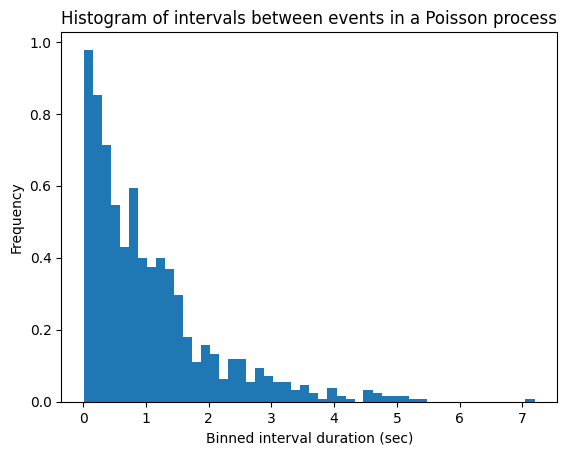

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import binom
from scipy.stats import expon
# Let's go back to simulating a Poisson process as the limit of a sequence of
# Bernoulli trials as the interval size->0.
delta_t = 1000          # Assume the whole process takes this long
plambda = 1             # Rate (events per sec)
num_bins_per_second = 100    # Number of bins in which to check for events
total_bins = round(num_bins_per_second*delta_t)

# First convert lambda (overall rate) to probability/bin, using deltaT
#   events/time divided by bins/time = events/bin
p = plambda * delta_t / total_bins

# Now simulate checking one "outcome" per bin, using the given probability/bin
outcomes = binom.rvs(1, p, size=total_bins)

# Check that the nubmer of events is what we expect
print(f'number of events expected={plambda*delta_t}, actual={np.sum(outcomes==1)}')

# Now for the next part -- instead of looking at the counts per interval,
#   which is what the Poisson distribution described, we are now going to look
#   at the same data but are considering the intervals between events. As you
#   will see below, these intervals are distributed as an exponential.
# First look at the histogram of intervals between events
# Get intervals
intervals_between_events = np.diff(np.where(outcomes==1))

# Convert to seconds
intervals_between_events_sec = intervals_between_events/num_bins_per_second

# Make and show the normalized histogram. Here the interval is a continuous
#   variable (the x-axis is binned in the histogram to visualize it, but the
#   actual values can take on any continuous value because they represent the
#   amount of time since the previous event), so to normalize the histogram to
#   make a pdf we can't just sum the values -- we have to sum the values
#   multiplied by the bin width (i.e., take the integral). We use numpy's
#   "trapz" which treats each bin as a trapezoid (because the heights before
#   and after can be slightly different) to compute the integral:
counts, edges = np.histogram(intervals_between_events_sec, bins=50)
plt.bar(edges[:-1], np.divide(counts, np.trapz(counts, edges[:-1])), width=0.15, align='edge')
plt.title('Histogram of intervals between events in a Poisson process')
plt.xlabel('Binned interval duration (sec)')
plt.ylabel('Frequency')

# Compare to an exponential distribution (see below), in red, with the rate
#   parameter lambda equal to 1/lambda
# plt.plot(edges[:-1], expon.pdf(edges[:-1], scale=1/plambda), 'r-', linewidth=2)
plt.show()